In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Fetch Tesla data from Jan 2021 to Nov 2024
tsla = yf.download("TSLA", start="2021-01-01", end="2024-05-26")

# Use 'Close' prices for prediction
data = tsla[['Close']].copy()

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Parameters for sequence creation
seq_len = 6*30 
pred_len = 30  

# Create sequences
def create_sequences(data, seq_len, pred_len):
    s = []
    for i in range(len(data) - seq_len - pred_len + 1):
        # print([data[i:i + seq_len+pred_len].values])
        s.append(data[i:i + seq_len+pred_len].values)
    return np.array(s)

# Convert scaled data back to DataFrame with dates
data_scaled_df = pd.DataFrame(data_scaled, columns=['Close'], index=tsla.index)
s = create_sequences(data_scaled_df, seq_len, pred_len)

cut_off = int(.8 * s.shape[0])
X_train = s[:cut_off, :seq_len,:]
X_test = s[cut_off:, :seq_len,:]

y_train = s[:cut_off, seq_len:]
y_test = s[cut_off:,seq_len:]


2024-11-29 18:02:48.261172: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-29 18:02:59.285681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-29 18:03:05.387165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[*********************100%***********************]  1 of 1 completed


In [2]:
model = Sequential([
    Dense(180),
    LeakyReLU(),
    Dense(360),
    LeakyReLU(),
    Dense(360),
    LeakyReLU(),
    Dense(pred_len)
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    s[:cut_off,:seq_len,0],s[:cut_off,seq_len:,0],
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1234  
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0149 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125 
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[193.76042 196.44116 194.4043  193.29149 202.53255 198.98175 197.6977
  190.80571 195.38556 189.49062 195.11185 199.23375 201.13821 202.1606
  210.93169 205.72699 207.6562  208.60367 212.0684  215.96994 222.16914
  225.18166 222.86885 227.65324 234.0301  226.7369  228.00858 230.07605
  222.04108 227.74431]]
[[199.3999939  199.72999573 202.03999329 201.88000488 202.63999939
  188.13999939 180.74000549 176.53999329 178.6499939  175.33999634
  177.77000427 177.53999329 169.47999573 162.5        163.57000732
  173.80000305 171.32000732 175.66000366 172.82000732 170.83000183
  172.63000488 177.66999817 179.83000183 175.78999329 175.22000122
  166.63000488 168.38000488 171.11000061 164.8999939  172.97999573]]


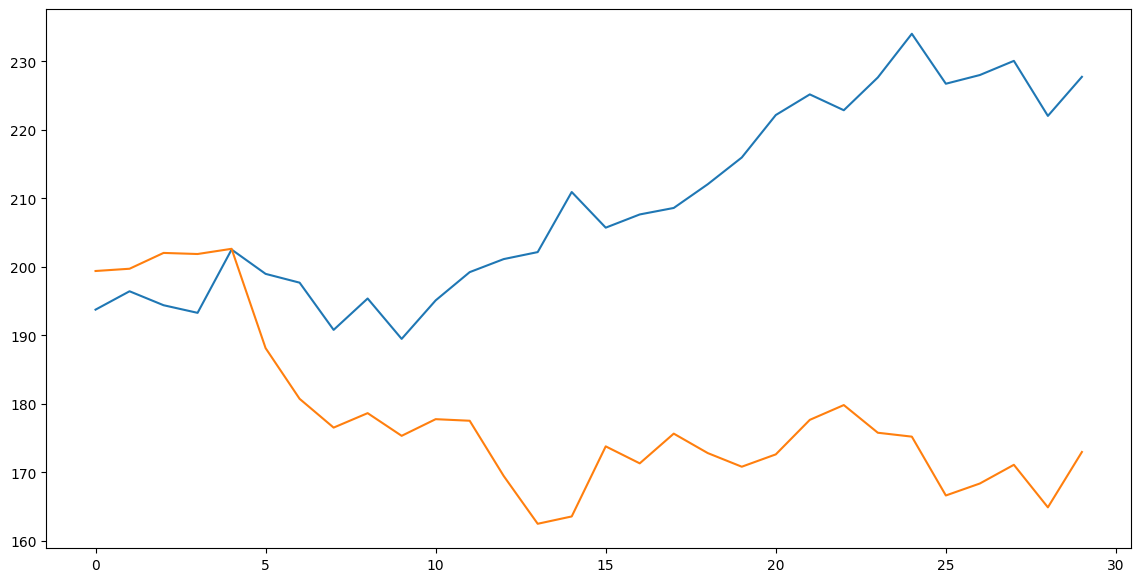

'\n    \n    #TEST\n    X_test_seq = X[cut_off+ind-1]\n    test_predictions = model.predict(X_test_seq.reshape(1,seq_len)) # seq of length 180\n    assert X_test_seq not in X_train[:,:-1]\n\n    test_predictions_rescaled = scaler.inverse_transform(test_predictions)\n    y_test_seq = y[cut_off+ind-1]\n    y_test_rescaled = scaler.inverse_transform(y_test_seq)\n\n    #TRAIN\n    X_input_seq = X[cut_off-pred_len+ind-1]\n    # X_input_seq= X[-(pred_len + ind+1)]\n    input_predictions = model.predict(X_input_seq.reshape(1,seq_len)) # seq of length 180\n    input_predictions_rescaled = scaler.inverse_transform(input_predictions)\n\n    y_input_seq = y[cut_off+ind-pred_len]\n    y_input_rescaled = scaler.inverse_transform(y_input_seq)\n\n    print(scaler.inverse_transform(X_test_seq.reshape(-1, 1)))\n    print(scaler.inverse_transform(y_test_seq.reshape(-1, 1)))\n\n    # Plot the predictions vs true values (November 2024)\n    plt.figure(figsize=(14, 7))\n    # Plot the last month\'s predict

In [3]:
def predict_and_plot(s, model,ind):
    plt.figure(figsize=(14, 7))

    # future = model.predict(s[cut_off-1,:seq_len,:].reshape(1,seq_len))
    # future_transform = scaler.inverse_transform(future)
    # plt.plot(np.arange(0,len(future[0])),future_transform[0], label = "future prediction")

    # future_true = s[cut_off+pred_len-1,seq_len:,:]
    # future_true_transform = scaler.inverse_transform(future_true)
    # plt.plot(np.arange(0,len(future_true_transform)), future_true_transform, label = "future true")

    """
    past_true = s[cut_off-2,seq_len:,:]
    past_true_transform = scaler.inverse_transform(past_true)
    plt.plot(np.arange(-len(past_true),0), past_true_transform, label = "past true")

    past_predict = model.predict(s[cut_off-2-pred_len,:seq_len,:].reshape(1,seq_len))
    past_predict_transform = scaler.inverse_transform(past_predict)
    plt.plot(np.arange(-len(past_predict_transform[0]),0), past_predict_transform[0], label = "past predict")
    """

    ### 
    """
    future = model.predict(s[cut_off-1,:seq_len,:].reshape(1,seq_len))
    future_transform = scaler.inverse_transform(future)
    plt.plot(np.arange(0,len(future[0])),future_transform[0], label = "future prediction")
    
    past_true = s[cut_off-1,seq_len:,:]
    past_true_transform = scaler.inverse_transform(past_true)
    plt.plot(np.arange(0,len(future[0])), past_true_transform, label = "past true pred (30)")

    plt.legend(loc="upper left")
    """
    future = model.predict(s[cut_off+pred_len,:seq_len,:].reshape(1,seq_len)) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
    future_transform = scaler.inverse_transform(future)
    print(future_transform)
    plt.plot(np.arange(0,len(future[0])),future_transform[0], label = "future prediction")
    
    future_true =s[cut_off+pred_len,seq_len:,:].reshape(1,pred_len) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
    future_true_transform = scaler.inverse_transform(future_true)
    print(future_true_transform)
    # print(future_transform)
    plt.plot(np.arange(0,len(future_true_transform[0])),future_true_transform[0], label = "true future")



    
    """
    # Plot the predictions vs true values (November 2024)
    plt.figure(figsize=(14, 7))
    # Plot the last month's predictions vs true values
    plt.plot(np.arange(-len(y_input_rescaled),0), y_input_rescaled, label='input true', color='green')
    plt.plot(np.arange(-len(y_input_rescaled),0), input_predictions_rescaled.reshape(-1,1), label='Train predict', linestyle='dashed', color='red')

    plt.plot(np.arange(0,len(y_test_rescaled)), y_test_rescaled, label='Test True', color='blue')
    plt.plot(np.arange(0,len(y_test_rescaled)), test_predictions_rescaled.reshape(-1,1), label='Predicted November 2024', color='red')
    plt.title('Predicted vs True Tesla Stock Prices')
    plt.xlabel('Trading Days')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.grid(True)
    """
    plt.show()
predict_and_plot(s, model,0)
"""
    
    #TEST
    X_test_seq = X[cut_off+ind-1]
    test_predictions = model.predict(X_test_seq.reshape(1,seq_len)) # seq of length 180
    assert X_test_seq not in X_train[:,:-1]

    test_predictions_rescaled = scaler.inverse_transform(test_predictions)
    y_test_seq = y[cut_off+ind-1]
    y_test_rescaled = scaler.inverse_transform(y_test_seq)

    #TRAIN
    X_input_seq = X[cut_off-pred_len+ind-1]
    # X_input_seq= X[-(pred_len + ind+1)]
    input_predictions = model.predict(X_input_seq.reshape(1,seq_len)) # seq of length 180
    input_predictions_rescaled = scaler.inverse_transform(input_predictions)

    y_input_seq = y[cut_off+ind-pred_len]
    y_input_rescaled = scaler.inverse_transform(y_input_seq)

    print(scaler.inverse_transform(X_test_seq.reshape(-1, 1)))
    print(scaler.inverse_transform(y_test_seq.reshape(-1, 1)))

    # Plot the predictions vs true values (November 2024)
    plt.figure(figsize=(14, 7))
    # Plot the last month's predictions vs true values
    plt.plot(np.arange(-len(y_input_rescaled),0), y_input_rescaled, label='input true', color='green')
    plt.plot(np.arange(-len(y_input_rescaled),0), input_predictions_rescaled.reshape(-1,1), label='Train predict', linestyle='dashed', color='red')

    plt.plot(np.arange(0,len(y_test_rescaled)), y_test_rescaled, label='Test True', color='blue')
    plt.plot(np.arange(0,len(y_test_rescaled)), test_predictions_rescaled.reshape(-1,1), label='Predicted November 2024', color='red')
    plt.title('Predicted vs True Tesla Stock Prices')
    plt.xlabel('Trading Days')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.show()

train_predictions = model.predict(X_train)
predictions.shape
# Transform predictions and true values back to the original scale

prediction_0 = predictions_rescaled[0] # len 30


train_predictions_rescaled = scaler.inverse_transform(train_predictions)
train_prediction_0 = predictions_rescaled[0] # len 30


y_train_rescaled = scaler.inverse_transform(y_train.reshape(-1, pred_len))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, pred_len))

# Plot the predictions vs true values (November 2024)
plt.figure(figsize=(14, 7))

# Plot the last month's predictions vs true values
plt.plot(np.arange(-len(y_train_rescaled[-30]),0), y_train_rescaled[-30], label='Train true', color='green')
# plt.plot(range(len(train_predictions_rescaled[0])), train_predictions_rescaled[0], label='Train predict', linestyle='dashed', color='red')

plt.plot(range(len(y_test_rescaled[0])), y_test_rescaled[0], label='Test True', color='blue')
plt.plot(range(len(predictions_rescaled[0])), predictions_rescaled[0], label='Predicted November 2024', linestyle='dashed', color='red')

plt.title('Predicted vs True Tesla Stock Prices')
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
"""


In [4]:
# model = Sequential([
#     Dense(180),
#     LeakyReLU(),
#     Dense(360),
#     LeakyReLU(),
#     Dense(360),
#     LeakyReLU(),
#     Dense(pred_len)
# ])
# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# # Train the model
# history = model.fit(
#     s[:,:seq_len,0],s[:,seq_len:,0],
#     epochs=100,
#     batch_size=32,
#     verbose=1
# )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[*********************100%***********************]  1 of 1 completed

[[197.62935 197.912   203.04248 200.05002 203.67172 196.7841  192.9358
  203.04    198.59996 203.35468 207.42276 210.49794 212.62556 214.55328
  211.09244 213.28076 207.05457 207.07439 210.02393 211.28612 209.75877
  210.6936  209.7629  217.40964 215.19064 218.28084 207.4935  207.51794
  195.08148 199.20183]]


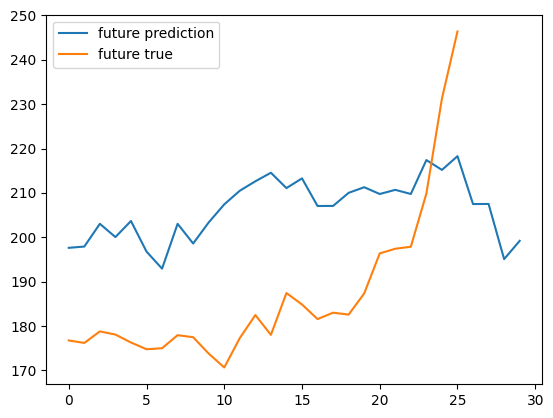

In [5]:
future = model.predict(s[-1,-seq_len:,[0]].reshape(1,seq_len)) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
future_transform = scaler.inverse_transform(future)
print(future_transform)
plt.plot(np.arange(0,len(future[0])),future_transform[0], label = "future prediction")

# Fetch Tesla data from Jan 2021 to Nov 2024
tsla = yf.download("TSLA", start="2024-05-26", end="2024-7-05")

# Use 'Close' prices for prediction
data = tsla[['Close']].copy()
# print(data.shape)
plt.plot(np.arange(0,data.shape[0]),data, label = "future true")
plt.legend()

[[243.25666809]
 [245.03666687]
 [251.99333191]
 [272.01333618]
 [293.33999634]
 [270.39666748]
 [283.14666748]
 [284.80334473]
 [281.66665649]
 [275.38665771]
 [281.5166626 ]
 [283.4833374 ]
 [281.66333008]
 [282.21331787]
 [293.6000061 ]
 [294.36334229]
 [288.05334473]
 [278.47665405]
 [264.51000977]
 [279.93667603]
 [290.92999268]
 [284.89666748]
 [283.32998657]
 [284.07666016]
 [287.80667114]
 [283.15332031]
 [268.27334595]
 [270.55334473]
 [272.04000854]
 [265.40667725]
 [266.04998779]
 [262.45999146]
 [260.43331909]
 [238.16667175]
 [232.94667053]
 [247.33999634]
 [227.40666199]
 [225.16667175]
 [239.47666931]
 [228.81333923]
 [217.7333374 ]
 [207.14666748]
 [199.31666565]
 [187.66667175]
 [224.52667236]
 [222.68666077]
 [233.19999695]
 [231.24333191]
 [235.97999573]
 [225.62666321]
 [233.93666077]
 [217.72000122]
 [218.28999329]
 [223.33332825]
 [220.72000122]
 [210.08999634]
 [213.46333313]
 [206.23666382]
 [203.76333618]
 [211.87333679]
 [222.64332581]
 [220.58332825]
 [230.35

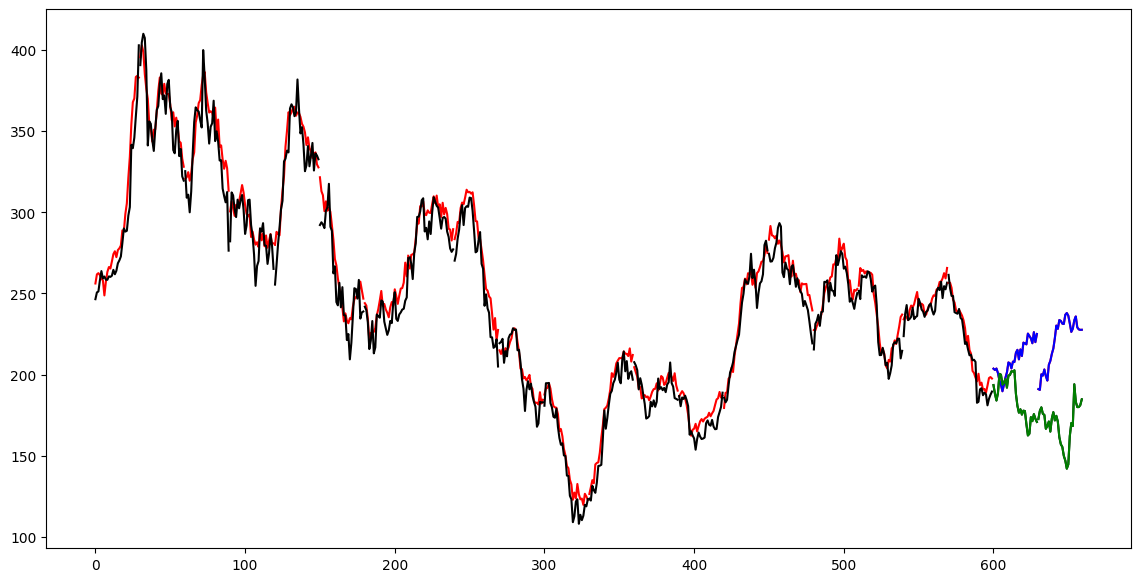

In [6]:
def predict_and_plot(s, model,ind):
    cut_off+pred_len
    plt.figure(figsize=(14, 7))
    for idx in range(0,s.shape[0],30):

        print(scaler.inverse_transform(s[idx,:seq_len,:]))
        future = model.predict(s[idx,:seq_len,:].reshape(1,seq_len)) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
        future_transform = scaler.inverse_transform(future)
        plt.plot(np.arange(idx,idx+pred_len),future_transform[0], label = "train prediction", color = "red")
        
        future_true =s[idx,seq_len:,:].reshape(1,pred_len) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
        future_true_transform = scaler.inverse_transform(future_true)
        plt.plot(np.arange(idx,idx+pred_len),future_true_transform[0], label = "train future", color = "black")
    
    # for idx in range(cut_off, s.shape[0],30):
        if idx>cut_off:
            future = model.predict(s[idx,:seq_len,:].reshape(1,seq_len)) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
            future_transform = scaler.inverse_transform(future)
            plt.plot(np.arange(idx,idx+pred_len),future_transform[0], label = "test prediction", color = "blue")
            
            future_true =s[idx,seq_len:,:].reshape(1,pred_len) # sl = 180 [:, :seq_len,:], pl = 30 [:, seq_len:, :]
            future_true_transform = scaler.inverse_transform(future_true)
            plt.plot(np.arange(idx,idx+pred_len),future_true_transform[0], label = "test future", color = "green")
    # plt.legend()
    
    plt.show()
predict_and_plot(s, model,0)

In [242]:
s.shape[0]

645

In [199]:
scaler.inverse_transform(s[-1,-seq_len:,[0]])

array([[219.27000427, 222.17999268, 222.11000061, 209.97999573,
        214.6499939 , 223.71000671, 237.41000366, 242.83999634,
        233.58999634, 234.30000305, 235.6000061 , 241.19999695,
        234.21000671, 235.44999695, 236.08000183, 246.72000122,
        244.13999939, 240.08000183, 238.83000183, 235.58000183,
        238.72000122, 239.36999512, 242.63999939, 243.83999634,
        239.74000549, 237.00999451, 239.28999329, 251.05000305,
        253.5       , 252.08000183, 257.22000122, 247.13999939,
        254.5       , 252.53999329, 256.60998535, 261.44000244,
        253.17999268, 248.47999573, 248.41999817, 238.44999695,
        237.92999268, 237.49000549, 240.44999695, 234.96000671,
        233.94000244, 227.22000122, 218.88999939, 219.91000366,
        215.55000305, 211.88000488, 212.19000244, 208.80000305,
        209.13999939, 207.83000183, 182.63000488, 183.25      ,
        190.92999268, 191.58999634, 187.28999329, 188.86000061,
        187.91000366, 181.05999756, 185.

# Pywavelet

In [200]:
import pywt

def wavelet_smooth(data, wavelet='db4', level=8):
    """
    Smooth data using Discrete Wavelet Transform (DWT).
    
    Parameters:
        data (array-like): The input signal (1D array).
        wavelet (str): The wavelet type to use.
        level (int): The level of decomposition.
        
    Returns:
        smoothed_data (array-like): The smoothed signal.
    """
    # Decompose the signal
    coeffs = pywt.wavedec(data, wavelet, mode='symmetric', level=level)
    
    # Zero out detail coefficients to remove noise
    coeffs[1:] = [np.zeros_like(detail) for detail in coeffs[1:]]
    
    # Reconstruct the signal
    smoothed_data = pywt.waverec(coeffs, wavelet, mode='symmetric')
    return smoothed_data
def smooth_sequences(sequences, wavelet='db4', level=8):
    """
    Apply wavelet smoothing to a set of sequences.
    
    Parameters:
        sequences (array-like): A 3D array (num_samples, seq_len, 1) or 2D array (num_samples, seq_len).
        wavelet (str): The wavelet type to use.
        level (int): The level of decomposition.
    
    Returns:
        smoothed_sequences (array-like): The smoothed sequences.
    """
    smoothed = []
    for seq in sequences:
        smoothed_seq = wavelet_smooth(seq.flatten(), wavelet=wavelet, level=level)  # Smooth the sequence
        smoothed.append(smoothed_seq)
    return np.array(smoothed).reshape(sequences.shape)  # Reshape to original shape

# Apply smoothing to X_train, X_test, y_train, y_test
X_train_smoothed = smooth_sequences(X_train)
y_train_smoothed = smooth_sequences(y_train)

X_test_smoothed = smooth_sequences(X_test)
y_test_smoothed = smooth_sequences(y_test)
# Build LSTM model
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(64, activation='tanh'),
    Dense(pred_len)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train with smoothed data
history = model.fit(
    X_train_smoothed, y_train_smoothed,
    epochs=50,
    batch_size=32,
    verbose=1
)


/home/mili/.local/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.2011
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0333
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0222
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0238
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - loss: 0.0217
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0224
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0216
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0224
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0220
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0217
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0246
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0215
Epoch 13/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0223
Epoch 14/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0216
Epoch 15/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0233

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[235.58000183]
 [238.72000122]
 [239.36999512]
 [242.63999939]
 [243.83999634]
 [239.74000549]
 [237.00999451]
 [239.28999329]
 [251.05000305]
 [253.5       ]
 [252.08000183]
 [257.22000122]
 [247.13999939]
 [254.5       ]
 [252.53999329]
 [256.60998535]
 [261.44000244]
 [253.17999268]
 [248.47999573]
 [248.41999817]
 [238.44999695]
 [237.92999268]
 [237.49000549]
 [240.44999695]
 [234.96000671]
 [233.94000244]
 [227.22000122]
 [218.88999939]
 [219.91000366]
 [215.55000305]
 [211.88000488]
 [212.19000244]
 [208.80000305]
 [209.13999939]
 [207.83000183]
 [182.63000488]
 [183.25      ]
 [190.92999268]
 [191.58999634]
 [187.28999329]
 [188.86000061]
 [187.91000366]
 [181.05999756]
 [185.1000061 ]
 [187.58000183]
 [189.55999756]
 [193.57000732]
 [188.13000488]
 [184.02000427]
 [188.71000671]
 [200.44999695]
 [199.94999695]
 [193.75999451]
 [194.77000427]
 [197.41000366]
 [191.97000122]
 [199.3999939 ]
 [199.72999

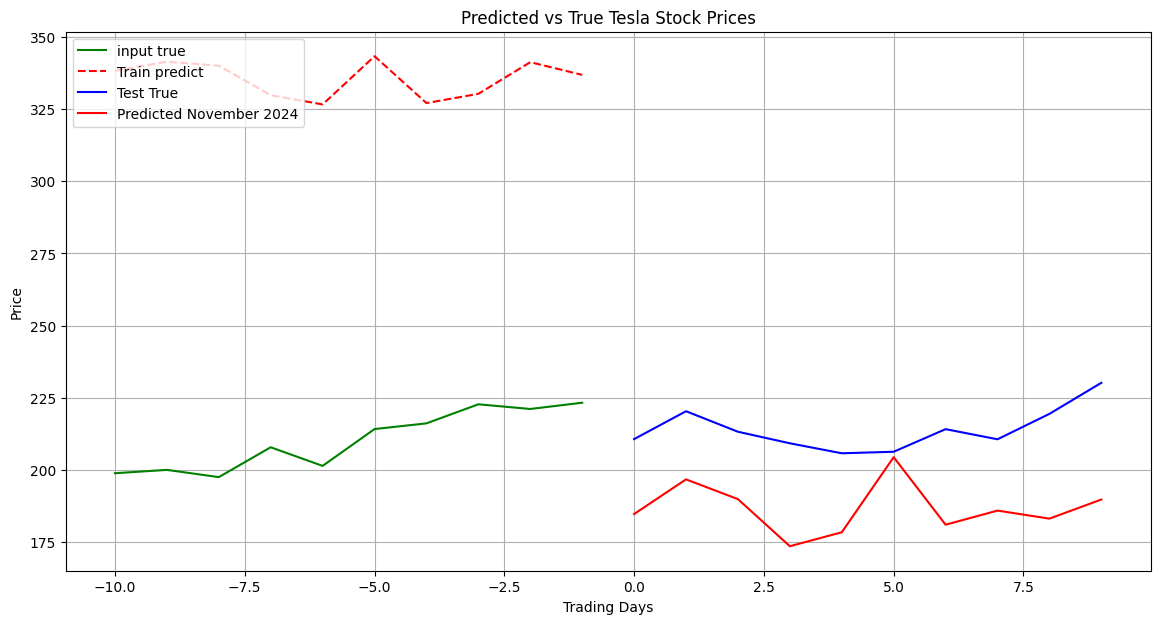

In [ ]:
predict_and_plot(X, y, model,20)

In [ ]:
smoothed_predictions = model.predict(X_test_smoothed)
smoothed_predictions.shape

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None

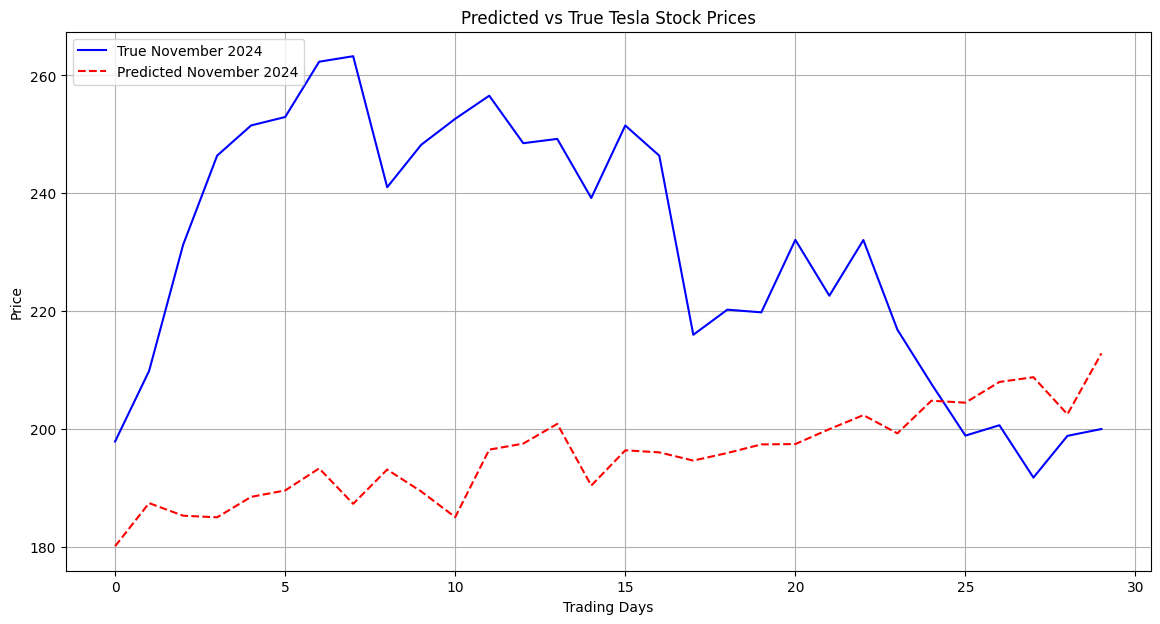

In [ ]:

# Transform predictions and true values back to the original scale
smoothed_predictions_rescaled = scaler.inverse_transform(smoothed_predictions)
smoothed_prediction_0 = smoothed_predictions_rescaled[0] # len 30
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, pred_len))

# Plot the predictions vs true values (November 2024)
plt.figure(figsize=(14, 7))

# Plot the last month's predictions vs true values
plt.plot(range(len(y_test_rescaled[0])), y_test_rescaled[0], label='True November 2024', color='blue')
plt.plot(range(len(predictions_rescaled[0])), predictions_rescaled[0], label='Predicted November 2024', linestyle='dashed', color='red')

plt.title('Predicted vs True Tesla Stock Prices')
plt.xlabel('Trading Days')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


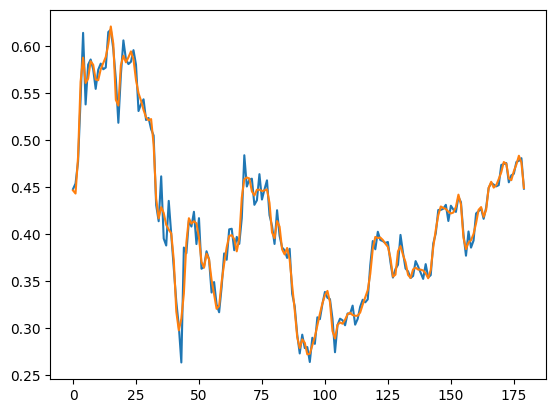

In [ ]:
plt.plot(X_train[0])
plt.plot(X_train_smoothed[0])